# Resposta ao impulso unitário

Renato Naville Watanabe

## Preparação do ambiente

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Definição

A **resposta ao impulso unitário** (às vezes também chamada de **resposta impulsiva**) de um sistema discreto é o sinal de saída de um sistema quando um impulso unitário $\delta[n]$ é usado como sinal de entrada do sistema e inicialmente o sistema está em repouso. A resposta ao impulso é normalmente representada pela letra $h[n]$.

<img src=Imagens/diagimpulso.png width="400">

Para calcular a resposta ao impulso de um sistema de tempo discreto, basta colocar o sinal $\delta[n]$ como entrada do sistema, e calcular os valores de forma recursiva (existe uma outra maneira, mais eficiente, que veremos em outro momento).

---

### Exemplo 1

Por exemplo, para o sistema com a seguinte equação de diferença:

$$y[n] = 1x[n] - 0.6x[n-1] + 0.3x[n-2] + 0.1x[n-3]$$


Usando $x[n] = \delta[n]$, temos:

$h[0] = \delta[0] - 0.6 \delta[-1] + 0.3 \delta[-2] + 0.1 \delta[-3] = 1$

$h[1] = \delta[1] - 0.6 \delta[0] + 0.3 \delta[-1] + 0.1 \delta[-2] = -0.6$

$h[2] = \delta[2] - 0.6 \delta[1] + 0.3 \delta[0] + 0.1 \delta[-1] = 0.3$

$h[3] = \delta[3] - 0.6 \delta[2] + 0.3 \delta[1] + 0.1 \delta[0] = 0.1$

$h[4] = \delta[4] - 0.6 \delta[3] + 0.3 \delta[2] + 0.1 \delta[1] = 0$

$\vdots $

$h[k] = 0, k>3$

O gráfico da resposta ao impulso está abaixo:

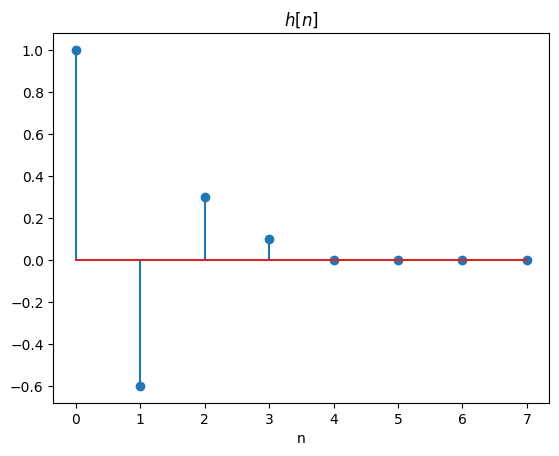

In [3]:
def delta(k, N):
    impulso = np.zeros(N)
    impulso[k] = 1
    return impulso

x = delta(0, 8)
y = np.zeros_like(x)
for n in range(len(x)):
    y[n] = x[n] - 0.6*x[n-1]+0.3*x[n-2]+0.1*x[n-3]
plt.stem(y)
plt.title('$h[n]$')
plt.xlabel('n');

---

Sempre que o sistema depender apenas de valores da entrada, a resposta impulsiva será os coeficientes que multiplicam os valores da entrada. Esse tipo de sistema, que a saída depende apenas da entrada, é chamado de sistema ***moving average*** (na maioria das vezes se usa apenas a sigla **MA**).


Isso não acontece se o sinal de sáida do sistema depender também de valores passados da própria saída. 

---

### Exemplo 2

Considerando o sistema descrito pela seguinte equação de diferenças:

$$y[n] = 0.3y[n-1] - 0.2y[n-2] + 0.1x[n] - 0.2x[n-1]$$

Um diagrama de blocos para esse sistema está abaixo (tente se convencer que o diagrama de blocos abaixo representa essa equação de diferenças):

<img src=Imagens/diagexemploMAimpulso.png width="600">

Usando $x[n] = \delta[n]$, temos (te):

$h[0] =0.3h[-1] - 0.2h[-2] + 0.1\delta[0] - 0.2\delta[-1] = 0.1$

$h[1] = 0.3h[0] - 0.2h[-1] + 0.1\delta[1] - 0.2\delta[0] = -0.17$

$h[2] = 0.3h[1] - 0.2h[0] + 0.1\delta[2] - 0.2\delta[1] = -0.071$

$h[3] = 0.3h[2] - 0.2h[1] + 0.1\delta[3] - 0.2\delta[2] = 0.0127$

$h[4] = 0.3h[3] - 0.2h[2] + 0.1\delta[4] - 0.2\delta[3] = 0.01801$

$\vdots $


O gráfico da resposta ao impulso desse sistema é:

Text(0.5, 0, 'n')

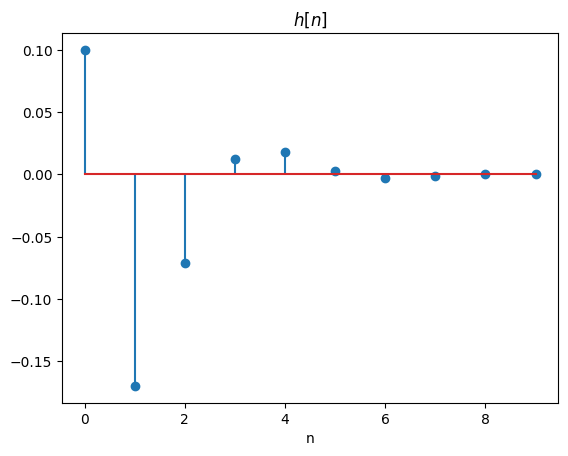

In [4]:
x = delta(0, 10)
y = np.zeros_like(x)
for n in range(len(x)):
    y[n] = 0.3*y[n-1] - 0.2*y[n-2] + 0.1*x[n] - 0.2*x[n-1]
plt.stem(y)
plt.title('$h[n]$')
plt.xlabel('n')

Nesse caso, em que o sistema depende de valores passados da própria saída temos que calcular a resposta ao impulso de forma recursiva. Note que a resposta ao impulso desse sistema nunca vai para zero, embora conforme se avance no tempo os valores ficam muito pequenos. 

---

Quando a resposta ao impulso nunca vai para zero, como nesse caso, dizemos que a resposta ao impulso é **infinita** (na maioria das vezes, usamos a sigla em inglês **IIR**). Quando a resposta ao impulso vai para zero depois de algum tempo, como no primeiro exemplo, dizemos que a resposta ao impulso é **finita** (na maioria das vezes, usamos a sigla em inglês **FIR**).

Repare que no diagrama de blocos desse sistema aparececem dois caminhos cíclicos (realimentação ou *feedback*). Esses caminhos cíclicos sempre vão aparecer no diagrama de blocos quando o sistema depender de valores passados da própria saída. Os sistemas que têm uma dependência de valores passados da saída do próprio sistema são chamados de ***autoregressive moving average*** (na maioria das vezes se usa apenas a sigla **ARMA**).

Sempre que tivermos um sistema ARMA, a resposta ao impuslo será infinita, devido às realimentações (caminhos cícliuocos no diagrama de blocos) existentes no sistema. Um sistema MA sempre terá uma resposta ao impulso finita.

## Exercícios

**1)** Determine os 5 primeiros valores da resposta ao impulso dos seguintes sistemas:

a) $y[n+1] + 2y[n] = x[n]$

b) $y[n] = -3y[n-1] + x[n]$

c) 

<img src=Imagens/ex11diagA.png width="600">

d) $y[n] - 6y[n-1]+23y[n-2] - 3x[n] + 5x[n-1] = 0$

**2)** Dados dois sistemas conectados em série (S1, seguido de S2):

S1: $y_1[n] = 2x_1[n] - 2x_1[n-1]$

S2: $y_2[n] = 5x_2[n]-4x_2[n-1]$

Encontre a resposta ao impulso do sistema.

**3)**  Dados dois sistemas conectados em paralelo:

S1: $y_1[n] = 2x_1[n] - 2x_1[n-1]$

S2: $y_2[n] = 5x_2[n]-4x_2[n-1]$

Encontre a resposta ao impulso do sistema.

**4)** Considere o sistema abaixo:

$$y[n] = ny[n-1]+x[n] $$

$y[n] = 0$ para $n < 0$

a) Qual a resposta ao impulso do sistema? Encontre os 10 primeiros valores de $h[n]$.

b) O sistema é linear?

c) O sistema é invariante no tempo?

**5)** Indique se os sistemas que geraram as seguintes respostas ao impulso são ou não são causais:

a) $h_1[n] = 0.2^nu[n]$

b) $h_2[n] = (0.2)^nu[n-1]$

c) $h_3[n] = 0.2^{|n|}$

d) $h_4[n] = u[n+3] - u[n-3] $

e) $h_5[n] = 0.5^nu[n] + 2^nu[-n-1]$

**6)** Considere a seguinte equação de diferenças:

$$y[n] = ay[n-1] + x[n] $$

a) Encontre uma expressão para a resposta ao impulso do sistema $h[n]$ em função da constante $a$.

b) Para que faixa de valores de $a$ o sistema é estável?

## Referências

- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007

## Solução dos exercícios